In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
%matplotlib inline

# 1. Detect breast cancer - Logistic Regression

In [97]:
bc = pd.read_csv('breadst_cancer_data.csv')
bc.drop(['Unnamed: 32','id'], axis=1, inplace=True)   # removing non-important variables
bc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


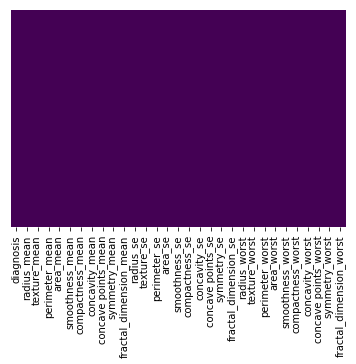

In [98]:
# visualize NA values
sns.heatmap(bc.isnull(), yticklabels=False,
            cbar=False, cmap='viridis')   

In [99]:
# changing M, F to binary 
classification = []
for row in bc['diagnosis']:
    if row =='M':
        classification.append(1)
    elif row=='B':
        classification.append(0)
bc['classification'] = classification
bc.head()

bc = bc.drop('diagnosis', 1) # remove diagnosis column
bc = bc.rename(columns = {"classification":"diagnosis"})
bc.head()



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [100]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [101]:
X_train, X_test, y_train, y_test = train_test_split(bc.drop('diagnosis',axis=1), # X data
                                                    bc['diagnosis'],  # y data (we want to know)
                                                    test_size=0.30, 
                                                    random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train,
             y_train)

predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions) # confusion data

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       105
           1       0.95      0.88      0.91        66

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



C:\Program Files\PythonAnaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[102,   3],
       [  8,  58]], dtype=int64)

In [102]:
# prediction -> 93, 95% accuracy

# 2. Detect breast cancer - Neural Network model

In [104]:
# chekc to make sure all variables are right
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = bc.drop(['diagnosis'], axis=1).values
y = bc['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=101)

X_train.shape

(398, 30)

In [121]:
early_stop = EarlyStopping(monitor='val_loss',   mode='min',
                           verbose=1,  patience=20) 

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=3,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam') 
model_loss = pd.DataFrame(model.history.history) # in order to visualize

model.fit(x=X_train, y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), 
          verbose=1, 
          callbacks=[early_stop])

Epoch 1/200
13/13 [==============================] - 0s 9ms/step - loss: 0.8992 - val_loss: 0.6014
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.5362 - val_loss: 0.4903
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.4354 - val_loss: 0.4454
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3886 - val_loss: 0.3755
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3407 - val_loss: 0.3197
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.3150 - val_loss: 0.2827
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2668 - val_loss: 0.2641
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2502 - val_loss: 0.2671
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2477 - val_loss: 0.2514
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2314 - val_loss: 0.2710
Epoch 11/

Epoch 83/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1603 - val_loss: 0.1911
Epoch 84/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1433 - val_loss: 0.1760
Epoch 85/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1385 - val_loss: 0.1847
Epoch 86/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1768 - val_loss: 0.2514
Epoch 87/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2225 - val_loss: 0.2242
Epoch 88/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1576 - val_loss: 0.1870
Epoch 89/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1805
Epoch 90/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1466 - val_loss: 0.2655
Epoch 91/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1567 - val_loss: 0.1765
Epoch 92/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1343 - val_loss: 0.2334


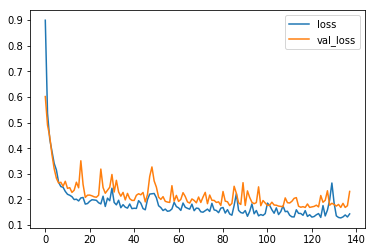

In [125]:
model_loss.plot()

In [124]:
# analysis
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       105
           1       0.83      0.95      0.89        66

   micro avg       0.91      0.91      0.91       171
   macro avg       0.90      0.92      0.90       171
weighted avg       0.91      0.91      0.91       171

